# Dish Table

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_feather("../Cleaned Data Files/Dish-cleaned.feather")

## Description

Each entry is a dish that was sold across one or multiple menus and that were found in common; contains metadata about how often it appeared and when it made first appearance on the menus

* There used to be 423397 records across 9 columns
* There are now 335094 records across 8 columns

In [4]:
df.shape

(335094, 8)

In [5]:
df.dtypes

id                  int64
name               object
menus_appeared      int64
times_appeared      int64
first_appeared      int64
last_appeared       int64
lowest_price      float64
highest_price     float64
dtype: object

In [6]:
df.head(5)

,id,name,menus_appeared,times_appeared,first_appeared,last_appeared,lowest_price,highest_price
0,1,CONSOMME ROYAL PRINTANIERE,8,8,1897,1927,0.20,0.4
1,2,Chicken gumbo,111,117,1895,1960,0.10,0.8
2,3,Tomato aux croutons,13,13,1893,1917,0.25,0.4
3,4,Onion au gratin,41,41,1900,1971,0.25,1.0
4,5,St. Emilion,66,68,1881,1981,0.00,18.0


In [7]:
df.describe(include="all")

,id,name,menus_appeared,times_appeared,first_appeared,last_appeared,lowest_price,highest_price
count,335094.000000,335094,335094.000000,335094.000000,335094.000000,335094.000000,335094.000000,335094.000000
unique,NaN,311729,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,"EGGS, poached on toast (2)",NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,43,NaN,NaN,NaN,NaN,NaN,NaN
mean,245324.365975,NaN,3.315001,3.426710,1928.587298,1931.675909,0.880182,1.603636
std,144501.489283,NaN,24.663688,26.476158,29.333076,29.242441,5.734940,12.888359
min,1.000000,NaN,1.000000,1.000000,1851.000000,1851.000000,0.000000,0.000000
25%,109354.500000,NaN,1.000000,1.000000,1901.000000,1906.000000,0.000000,0.000000
50%,256260.500000,NaN,1.000000,1.000000,1917.000000,1920.000000,0.000000,0.050000
75%,363741.750000,NaN,2.000000,2.000000,1955.000000,1958.000000,0.500000,0.650000


## Missing Values - Section 1.1

* There were 100% of `Description` column values missing. That column was removed
* 6.8% of `lowest_price` column were missing. They were removed
* 6.8% of `highest_price` column were missing. They were removed

In [9]:
missing_percentage = (df.isnull().sum() / len(df)) * 100
missing_percentage.name = 'Percentage of Missing Values'
missing_percentage

id                0.0
name              0.0
menus_appeared    0.0
times_appeared    0.0
first_appeared    0.0
last_appeared     0.0
lowest_price      0.0
highest_price     0.0
Name: Percentage of Missing Values, dtype: float64

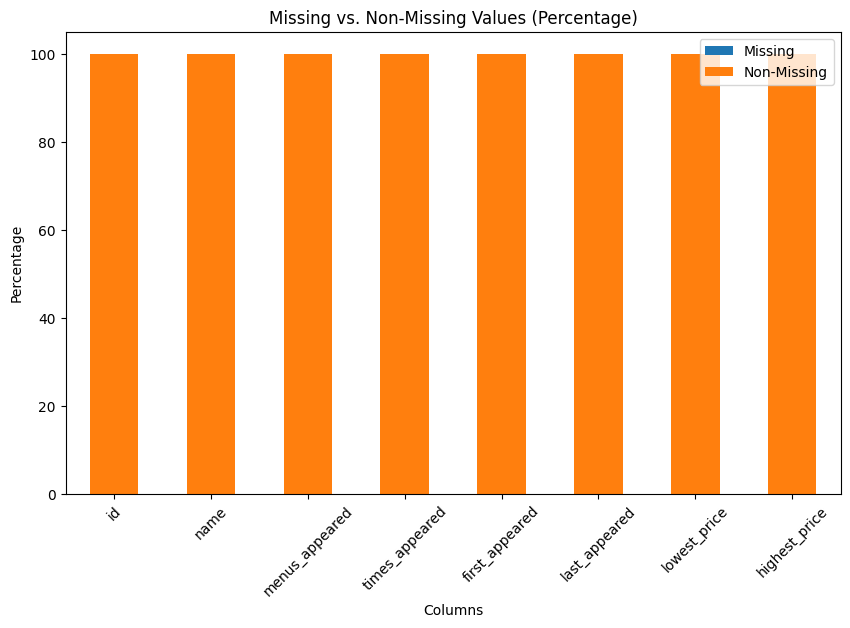

In [10]:
non_missing_percentage = 100 - missing_percentage
missing_data_percentage = pd.DataFrame({'Missing': missing_percentage, 'Non-Missing': non_missing_percentage})
missing_data_percentage.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Missing vs. Non-Missing Values (Percentage)')
plt.xlabel('Columns')
plt.ylabel('Percentage')
plt.xticks(rotation=45)
plt.show()

In [11]:
print("Is the ID column unique?", df['id'].is_unique)

Is the ID column unique? True


## Multiple Outliers - Section 1.2

* There were potential outliers in `menus_appeared` column, as some of the values are in the upper range of 4000-8000 appearances. The upper range of 8000 was removed but the rest were confirmed to be popular items like MILK or TEA
* There were potential outliers in `times_appeared` column, as some of the values are in the upper range of 4000-8000 appearances. The upper range of 8000 was removed but the rest were confirmed to be popular items like MILK or TEA

Min menus_appeared: 1, Max menus_appeared: 4319


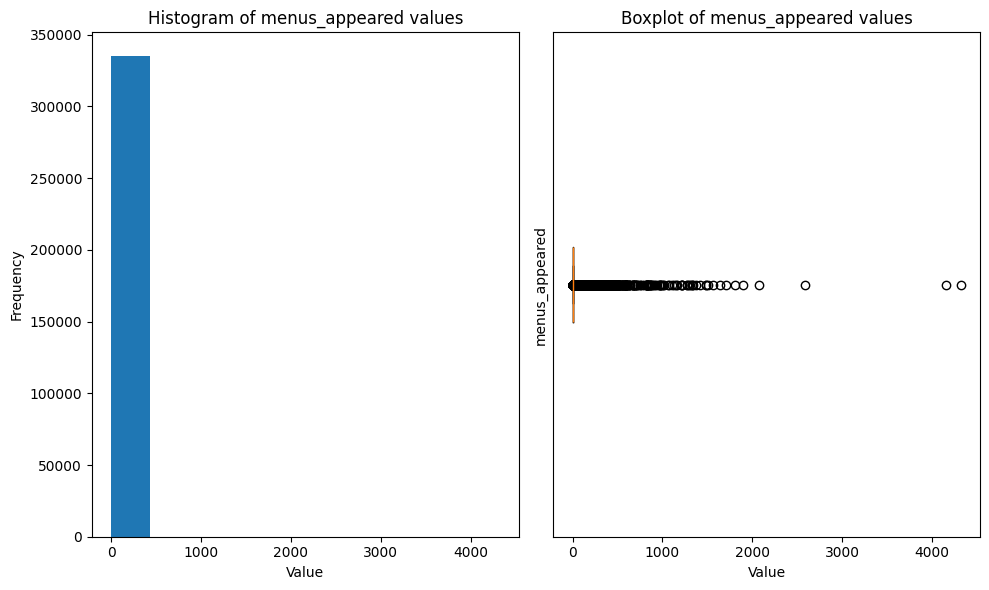

In [13]:
print(f"Min menus_appeared: {df['menus_appeared'].min()}, Max menus_appeared: {df['menus_appeared'].max()}")

plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
plt.hist(df['menus_appeared'], bins=10)
plt.title('Histogram of menus_appeared values')
plt.xlabel('Value')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.boxplot(df['menus_appeared'], vert=False)
plt.title('Boxplot of menus_appeared values')
plt.xlabel('Value')
plt.ylabel('menus_appeared')
plt.yticks([])

plt.tight_layout()
plt.show()

Min times_appeared: 1, Max times_appeared: 4769


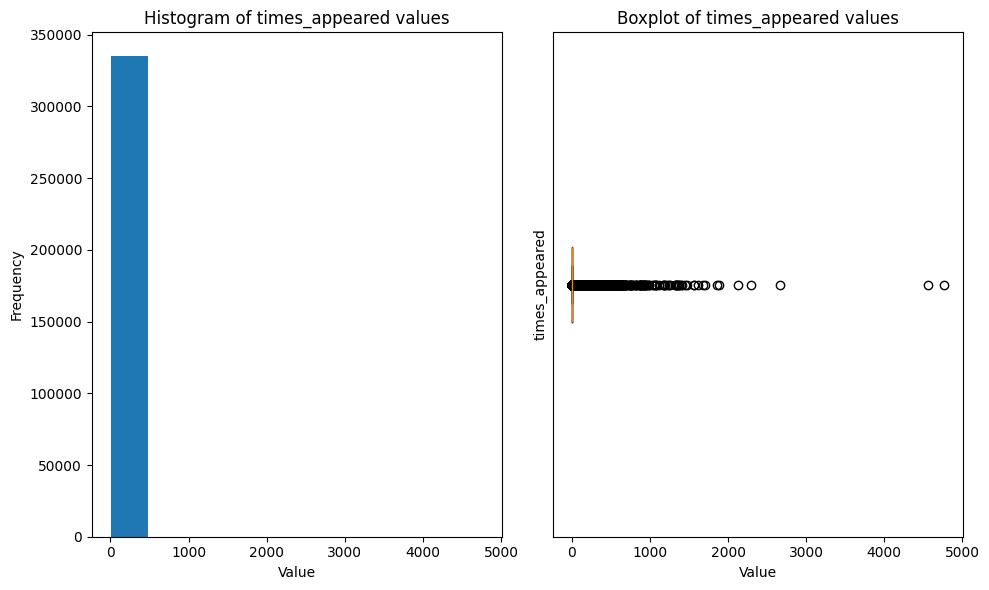

In [14]:
print(f"Min times_appeared: {df['times_appeared'].min()}, Max times_appeared: {df['times_appeared'].max()}")

plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
plt.hist(df['times_appeared'], bins=10)
plt.title('Histogram of times_appeared values')
plt.xlabel('Value')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.boxplot(df['times_appeared'], vert=False)
plt.title('Boxplot of times_appeared values')
plt.xlabel('Value')
plt.ylabel('times_appeared')
plt.yticks([])

plt.tight_layout()
plt.show()

## Multiple Outliers in Years- Section 1.3

* There were potential outliers in `first_appeared` column, as some of the values are in the 0 and 3000 years, which is not a possible year
* There were potential outliers in `last_appeared` column, as some of the values are in the 0 and 3000 years, which is not a possible year
* Those outliers were removed. Refer to Phase 2 documentation

Min first_appeared: 1851, Max first_appeared: 2012


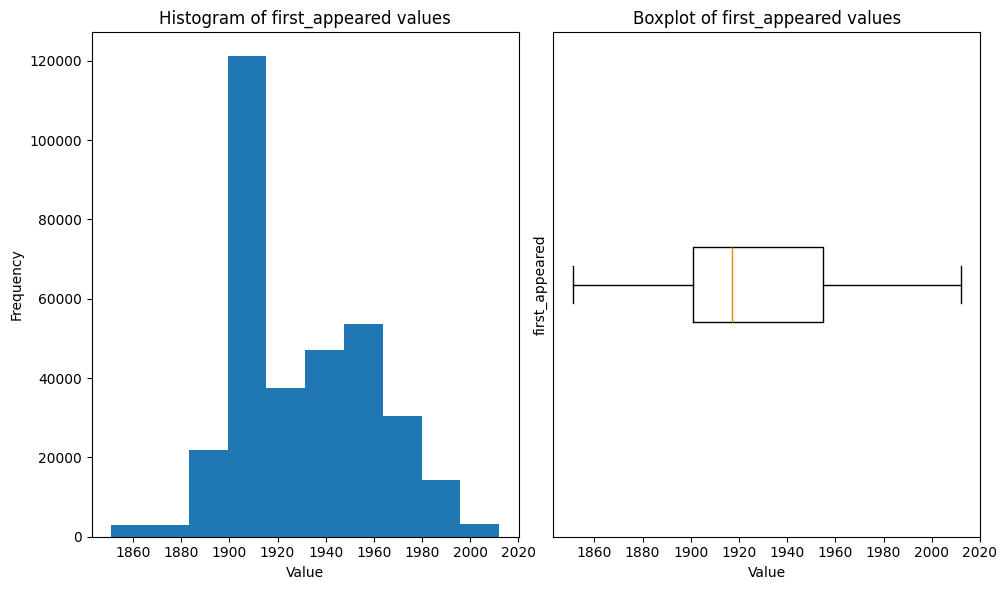

In [15]:
print(f"Min first_appeared: {df['first_appeared'].min()}, Max first_appeared: {df['first_appeared'].max()}")

plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
plt.hist(df['first_appeared'], bins=10)
plt.title('Histogram of first_appeared values')
plt.xlabel('Value')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.boxplot(df['first_appeared'], vert=False)
plt.title('Boxplot of first_appeared values')
plt.xlabel('Value')
plt.ylabel('first_appeared')
plt.yticks([])

plt.tight_layout()
plt.show()

Min last_appeared: 1851, Max last_appeared: 2012


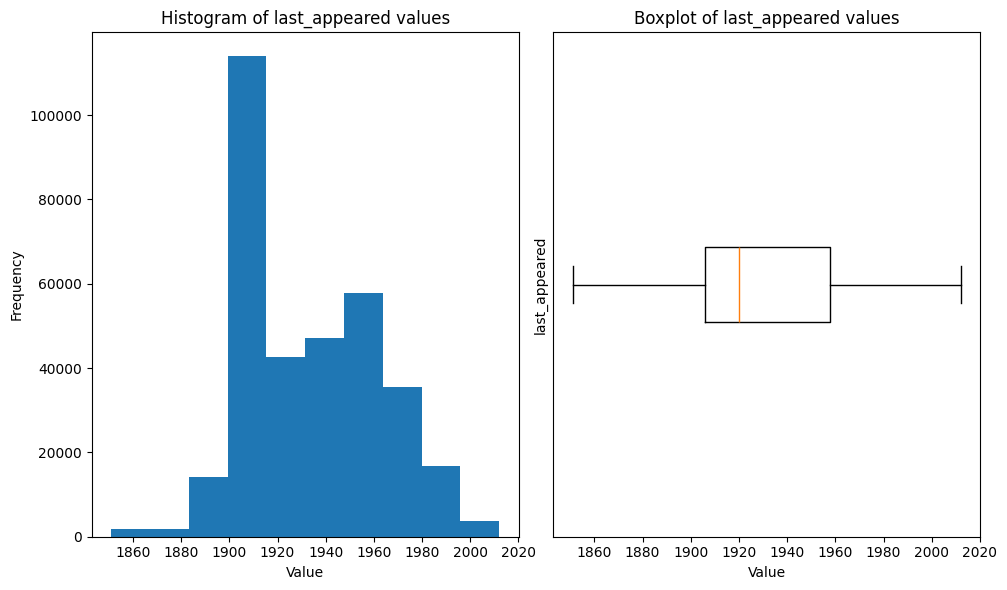

In [16]:
print(f"Min last_appeared: {df['last_appeared'].min()}, Max last_appeared: {df['last_appeared'].max()}")

plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
plt.hist(df['last_appeared'], bins=10)
plt.title('Histogram of last_appeared values')
plt.xlabel('Value')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.boxplot(df['last_appeared'], vert=False)
plt.title('Boxplot of last_appeared values')
plt.xlabel('Value')
plt.ylabel('last_appeared')
plt.yticks([])

plt.tight_layout()
plt.show()

## Column Misconfigured - Section 1.4

* `first_appeared` and `last_appeared` columns are incorrectly auto-recognized as `int64`. That is not fixable as Pandas doesn't pick it up correctly even though OpenRefine was converted to Date

In [18]:
df.dtypes

id                  int64
name               object
menus_appeared      int64
times_appeared      int64
first_appeared      int64
last_appeared       int64
lowest_price      float64
highest_price     float64
dtype: object

## Multiple Outliers in Price - Section 1.5

* There were potential outliers in `lowest_price` column, as some of the values are in the 1000s
* There were potential outliers in `highest_price` column, as some of the values are in the 1000s
* All outliers were removed. The rest were confirmed to be expensive items (special Ducks, hard to get food items)

In [21]:
print(f"Min lowest_price: {df['lowest_price'].min()}, Max lowest_price: {df['lowest_price'].max()}")

df["lowest_price"].describe()

Min lowest_price: 0.0, Max lowest_price: 800.0


count    335094.000000
mean          0.880182
std           5.734940
min           0.000000
25%           0.000000
50%           0.000000
75%           0.500000
max         800.000000
Name: lowest_price, dtype: float64

In [22]:
print(f"Min highest_price: {df['highest_price'].min()}, Max highest_price: {df['highest_price'].max()}")

df["highest_price"].describe()

Min highest_price: 0.0, Max highest_price: 3050.0


count    335094.000000
mean          1.603636
std          12.888359
min           0.000000
25%           0.000000
50%           0.050000
75%           0.650000
max        3050.000000
Name: highest_price, dtype: float64